# HSE 2023: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make conclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task.
Loops are only allowed in part 1 (Tasks 1 - 4).
* Some tasks contain tests. They only test your solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task.

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 points)

**Task 1** (0.5 points)<br/>
Enter nonzero numbers `a`, `d` and `N`. Find the sum of the first `N` members of [harmonic sequence](https://en.wikipedia.org/wiki/Harmonic_progression_(mathematics)) with the first member denominator `a`

In [ ]:
def find_sum(a: int, d: int, N: int) -> float:
    total = 0
    for i in range(N):
        total += 1 / (a + i*d)
    return total

a = 1
d = 1
N = 10
print(find_sum(a, d, N))

2.9289682539682538


**Task 2** (0.5 points) <br/>
Enter an integer number `N`. Check if it is a palindrome number **without converting it to the string**. It means that it can be read equally from left to right and from right to back.

In [ ]:
def check_palindrome(N):
    original = N
    reversed_num = 0

    while N:
        reversed_num = reversed_num * 10 + N % 10
        N //= 10

    return original == reversed_num

for N in [3, 81, 111, 113, 810, 2022, 4774, 51315, 611816]:
    print(N, check_palindrome(N))


3 True
81 False
111 True
113 False
810 False
2022 False
4774 True
51315 True
611816 False


**Task 3** (0.5 points) <br/>
Find the first `N` palindrome numbers starting from 42 (you may use the function from the precious task).

In [ ]:
def find_palindromes(N):
    palindromes = []
    number = 42
    while len(palindromes) < N:
        if check_palindrome(number):
            palindromes.append(number)
        number += 1
    return palindromes

print(find_palindromes(3))
print(find_palindromes(13))
print(find_palindromes(23))

[44, 55, 66]
[44, 55, 66, 77, 88, 99, 101, 111, 121, 131, 141, 151, 161]
[44, 55, 66, 77, 88, 99, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 202, 212, 222, 232, 242, 252, 262]


**Task 4** (0.5 points) <br/>
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the median number.

In [ ]:
from random import randint

def find_median(a, b, c):
    if (a < b and b < c) or (c < b and b < a):
        return b
    elif (b < a and a < c) or (c < a and a < b):
        return a
    else:
        return c

for i in range(10):
    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)
    print(a, b, c, '\tМедиана:', find_median(a, b, c))

-42 -92 -41 	Медиана: -42
-3 -49 -78 	Медиана: -49
-86 -41 19 	Медиана: -41
63 83 -42 	Медиана: 63
94 -90 0 	Медиана: 0
17 -57 -73 	Медиана: -57
-58 28 25 	Медиана: 25
-53 90 93 	Медиана: 90
54 98 -14 	Медиана: 54
40 -59 5 	Медиана: 5


# 2. Numpy (4 points)

**Task 1** (0.5 points) <br/>
Create a random array from Gaussian distribution with length of 12 and with sum of its elements equal to 15. Distribution shall be left Gaussian

In [ ]:
import numpy as np

# Создадим массив из гауссова распределения с математическим ожиданием -0.5 и стандартным отклонением 1.
my_array = np.random.normal(-0.5, 1, 11)

# Установим последний элемент так, чтобы сумма была равна 15.
my_array = np.append(my_array, 15 - np.sum(my_array))

print(f'Length: {len(my_array)}')
print(f'Sum of elements: {np.sum(my_array)}')


Length: 12
Sum of elements: 15.0


**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length.

Calculate the following distances between the arrays **without using any special function. You may only use basic numpy operations (`np.linalg.*` and other high-level ones are prohibited).**:

* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Chebyshev Distance
$$ d(a, b) = \underset{i}{max} |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2} $$


In [ ]:
# Функция для расстояния Манхэттена
def calculate_manhattan(a, b):
    distance = np.sum(np.abs(a - b))
    return distance

# Функция для Евклидова расстояния
def calculate_euclidean(a, b):
    distance = np.sqrt(np.sum((a - b)**2))
    return distance

# Функция для расстояния Чебышева
def calculate_chebyshev(a, b):
    distance = np.max(np.abs(a - b))
    return distance

# Функция для косинусного расстояния
def calculate_cosine(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.sqrt(np.sum(a**2))
    norm_b = np.sqrt(np.sum(b**2))
    cosine_similarity = dot_product / (norm_a * norm_b)
    distance = 1 - cosine_similarity
    return distance

In [ ]:
a = np.random.randn(12)
b = np.random.randn(12)

print(f'Manhattan distance: {calculate_manhattan(a, b)}')
print(f'Euclidean distance: {calculate_euclidean(a, b)}')
print(f'Chebyshev distance: {calculate_chebyshev(a, b)}')
print(f'Cosine distance: {calculate_cosine(a, b)}')

Manhattan distance: 11.118865677494211
Euclidean distance: 4.073626058384185
Chebyshev distance: 2.4055809814099787
Cosine distance: 0.9195050537335868


**Task 3** (0.5 points) <br/>
Create a random array of integers with length of 42. Transform the array so that
* Maximum element(s) value is 10
* Minimum element(s) value is -6
* Other values are in interval (-6; 10) without changing the relative order (relation $\frac{x_i}{x_{i-1}}=\frac{\widehat{x}_{i}}{\widehat{x}_{i-1}}$ holds)

In [ ]:
import numpy as np
def transform(array):

    log_array = np.sign(array) * np.log(np.abs(array) + 1)

    log_min = np.min(log_array)
    log_max = np.max(log_array)


    scaled_array = -6 + (log_array - log_min) * 16.0 / (log_max - log_min)

    return scaled_array

In [ ]:
my_array = np.random.randint(1, 100, size=42)  # Using positive integers to ensure the logic holds
transformed_array = transform(my_array)

print(f'Min: {np.min(transformed_array)}')
print(f'Max: {np.max(transformed_array)}')
print('Array:')
print(transformed_array)

Min: -6.0
Max: 10.0
Array:
[ 8.27479025 -3.1577569   6.2839703   5.23878717  9.22746521 10.
 -4.33739437  4.96531986  9.22746521  8.51966838 -6.          9.32627698
  9.60918156  9.9583703   6.67478874  1.67530615  9.27716873 10.
  6.67478874  9.60918156  0.5994841   8.33739437 -4.33739437  9.91631363
  9.07463423  6.38522211  8.69418365  1.34709183  9.22746521  8.27479025
  9.83088366  6.2839703   7.43789928  4.51754925  9.37480405  8.63683321
  7.35979235  4.35672511  9.51703184  5.73642615  8.75074303  9.9583703 ]


**Task 4** (0.5 points) <br/>
Create an array with shape of $10 \times 3$ with integers from [-12, 4]. Find a column that contains the minimum element of the array.

In [ ]:
import numpy as np

my_array = np.random.randint(-12, 5, size=(10, 3))

min_index = np.unravel_index(np.argmin(my_array), my_array.shape)
selected_column = min_index[1]

print('Shape: ', my_array.shape)
print('Array:')
print(my_array)
print(f'Selected column: {selected_column}')


Shape:  (10, 3)
Array:
[[ -7  -3  -8]
 [  4 -11  -8]
 [ -5 -12  -8]
 [ -4 -10 -12]
 [  4   4   4]
 [  2  -2 -12]
 [ -6 -12  -2]
 [  0   4   1]
 [  3   0   2]
 [  4   0 -10]]
Selected column: 1


**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with the most appropriate quantile, explain why you chose it.

In [ ]:
import numpy as np

arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan
print('Array:')
print(arr)

Array:
[0.33074222 0.51293852        nan 0.55836871 0.92803342 0.2011978
        nan 0.1673609  0.43686408        nan]


In [29]:
def replace_missing(arr):
    # Вычисляем медиану, игнорируя NaN значения
    median = np.nanmedian(arr)

    # Заменяем NaN значения медианой
    arr[np.isnan(arr)] = median

    return arr

In [30]:
arr = replace_missing(arr)
print('Array with no missing values:')
print(arr)

Array with no missing values:
[0.33074222 0.51293852 0.43686408 0.55836871 0.92803342 0.2011978
 0.43686408 0.1673609  0.43686408 0.43686408]


**Answer:** here

In [3]:
#Чтобы заменить отсутствующие значения в массиве, наиболее общим и часто используемым методом является замена медианой. Это потому, что медиана является устойчивой к выбросам оценкой центральной тенденции данных и не будет искажена экстремальными значениями так, как это может произойти со средним значением

**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the median and std for every channel (you should get a vector of shape 3, RGB).

In [32]:
def stats_channel(X):

    median = np.median(X, axis=(0, 1))
    std = np.std(X, axis=(0, 1))

    return median, std

In [33]:
n = 19
m = 23
X = np.random.randint(-11, 8, size=(n, m, 3))
median_values, std_values = stats_channel(X)
print("Median for RGB channels:", median_values)
print("Standard Deviation for RGB channels:", std_values)

Median for RGB channels: [-1. -2. -1.]
Standard Deviation for RGB channels: [5.56962388 5.4320123  5.32154953]


### **Task 7** (1 points) <br/>
Create a function which takes a 3D matrix ```X``` as an input and returns all its unique values along the first axis.

Sample input:

```
np.array(
  [[[1, 2, 3],
    [1, 2, 3],
    [1, 2, 3]],

   [[4, 5, 6],
    [4, 5, 7],
    [4, 5, 6]],

   [[7, 8, 9],
    [7, 8, 9],
    [7, 8, 9]]]
)
```
  
Sample output:

```
np.array(
  [[[1, 2, 3],
    [1, 2, 3]],

   [[4, 5, 6],
    [4, 5, 7]],

   [[7, 8, 9],
    [7, 8, 9]]]
)
```

In [ ]:
import numpy as np

def get_unique_values(X):
    result = []

    for layer in X:
        unique_rows = np.unique(layer, axis=0)
        result.append(unique_rows)

    return np.array(result)

In [ ]:
X =  np.random.randint(4, 6, size=(n, 3, 3))
print('Matrix:')
print(X)
print('Unique :')
get_unique_values(X)

Matrix:
[[[4 4 4]
  [5 4 4]
  [5 5 4]]

 [[4 4 5]
  [5 4 5]
  [5 4 4]]

 [[5 5 5]
  [4 5 4]
  [5 4 5]]

 [[4 5 4]
  [5 4 5]
  [5 4 4]]

 [[4 5 5]
  [4 4 4]
  [4 5 5]]

 [[4 4 4]
  [4 4 5]
  [5 4 4]]

 [[4 5 5]
  [5 4 4]
  [4 5 4]]

 [[4 4 4]
  [5 4 4]
  [4 5 4]]

 [[5 5 4]
  [5 4 5]
  [5 5 4]]

 [[4 4 5]
  [5 5 4]
  [4 5 5]]

 [[4 4 4]
  [5 5 5]
  [5 4 4]]

 [[5 4 4]
  [5 4 5]
  [5 5 4]]

 [[4 4 4]
  [4 5 4]
  [4 4 4]]

 [[5 5 5]
  [5 4 4]
  [4 4 5]]

 [[4 5 4]
  [5 4 4]
  [4 5 4]]

 [[4 4 4]
  [5 4 5]
  [5 4 5]]

 [[4 4 4]
  [4 4 4]
  [4 4 4]]

 [[4 4 4]
  [4 5 4]
  [5 4 4]]

 [[4 5 4]
  [5 4 4]
  [4 5 5]]]
Unique :


<ipython-input-22-eae52e07c037>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(result)


array([array([[4, 4, 4],
              [5, 4, 4],
              [5, 5, 4]]), array([[4, 4, 5],
                                  [5, 4, 4],
                                  [5, 4, 5]]), array([[4, 5, 4],
                                                      [5, 4, 5],
                                                      [5, 5, 5]]),
       array([[4, 5, 4],
              [5, 4, 4],
              [5, 4, 5]]), array([[4, 4, 4],
                                  [4, 5, 5]]), array([[4, 4, 4],
                                                      [4, 4, 5],
                                                      [5, 4, 4]]),
       array([[4, 5, 4],
              [4, 5, 5],
              [5, 4, 4]]), array([[4, 4, 4],
                                  [4, 5, 4],
                                  [5, 4, 4]]), array([[5, 4, 5],
                                                      [5, 5, 4]]),
       array([[4, 4, 5],
              [4, 5, 5],
              [5, 5, 4]]), array([[4, 4, 4],
    

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task won't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset and print first 6 rows

In [13]:
import seaborn as sns
import pandas as pd

# Загрузка набора данных Titanic из seaborn
dataset = sns.load_dataset('titanic')

# Вывод первых 6 строк
print(dataset.head(6))

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   
5         0       3    male   NaN      0      0   8.4583        Q  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
5    man        True  NaN   Queenstown    no   True  


**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In what columns?
    * What is the percentage of survived passengers? Are the classes balanced?
    * Were there more males or females?
    * What what the least popular port of embarkation?
    * How many passenger classes (pclass) were there on Tinanic?
    * What is the overall average ticket fare? And for every passenger class?
Please, write not only the answers but the code, proving it.

In [14]:
#Смотреть ответы при запуске

#1. Проверка наличия пропущенных значений:

missing_values = dataset.isnull().sum()
print("Пропущенные значения в колонках:\n", missing_values[missing_values > 0])


#2. Процент выживших пассажиров и балансировка классов:

survived_percentage = (dataset['survived'].mean() * 100)
print(f"Процент выживших пассажиров: {survived_percentage:.2f}%")

class_counts = dataset['pclass'].value_counts(normalize=True) * 100
print("\nРаспределение пассажиров по классам:\n", class_counts)


#3. Подсчёт мужчин и женщин на борту:

sex_counts = dataset['sex'].value_counts()
print("\nКоличество мужчин и женщин на борту:\n", sex_counts)


#4. Наименее популярный порт посадки:

least_popular_port = dataset['embarked'].value_counts().idxmin()
print("\nНаименее популярный порт посадки:", least_popular_port)


#5. Количество классов пассажиров на Titanic:

unique_pclasses = dataset['pclass'].nunique()
print(f"\nКоличество уникальных классов на Titanic: {unique_pclasses}")


#6. Средняя стоимость билета в целом и для каждого класса:

average_fare = dataset['fare'].mean()
print(f"\nСредняя стоимость билета: ${average_fare:.2f}")

average_fare_by_class = dataset.groupby('pclass')['fare'].mean()
print("\nСредняя стоимость билета для каждого класса:\n", average_fare_by_class)




Пропущенные значения в колонках:
 age            177
embarked         2
deck           688
embark_town      2
dtype: int64
Процент выживших пассажиров: 38.38%

Распределение пассажиров по классам:
 3    55.106622
1    24.242424
2    20.650954
Name: pclass, dtype: float64

Количество мужчин и женщин на борту:
 male      577
female    314
Name: sex, dtype: int64

Наименее популярный порт посадки: Q

Количество уникальных классов на Titanic: 3

Средняя стоимость билета: $32.20

Средняя стоимость билета для каждого класса:
 pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64


**Task 2** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example).

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the median age? And among males and females separately? Visualize it on the separate plot
    * Make conclusions about what you see on the plots

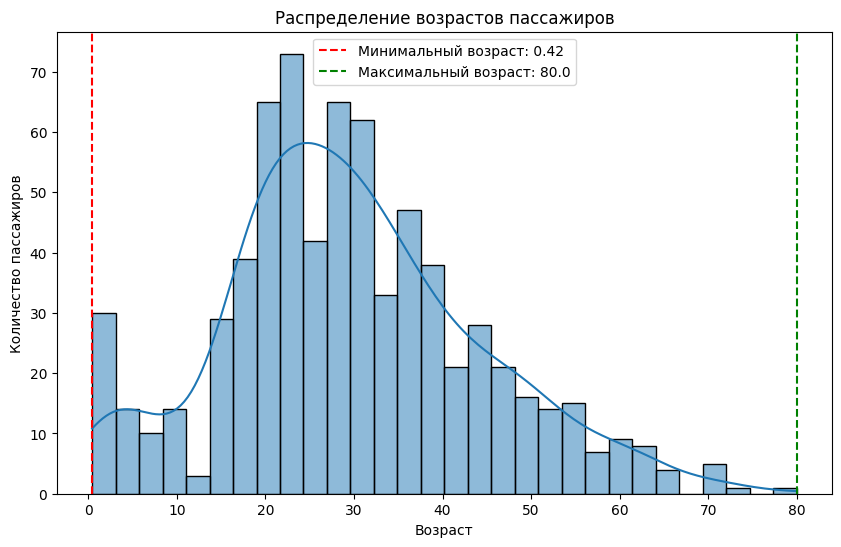

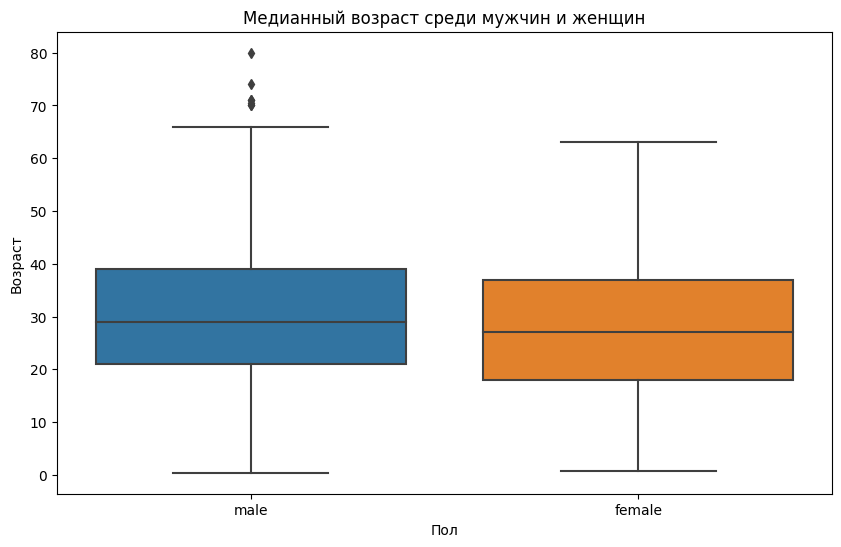

Минимальный возраст: 0.42
Максимальный возраст: 80.0
Медианный возраст: 28.0
Медианный возраст среди мужчин: 29.0
Медианный возраст среди женщин: 27.0


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка датасета
dataset = sns.load_dataset('titanic')

# Визуализация распределения возрастов
plt.figure(figsize=(10,6))
sns.histplot(dataset['age'].dropna(), bins=30, kde=True)
plt.title("Распределение возрастов пассажиров")
plt.xlabel("Возраст")
plt.ylabel("Количество пассажиров")
plt.axvline(dataset['age'].min(), color='red', linestyle='--', label=f"Минимальный возраст: {dataset['age'].min()}")
plt.axvline(dataset['age'].max(), color='green', linestyle='--', label=f"Максимальный возраст: {dataset['age'].max()}")
plt.legend()
plt.show()

# Визуализация медианного возраста среди мужчин и женщин
plt.figure(figsize=(10,6))
sns.boxplot(x='sex', y='age', data=dataset)
plt.title("Медианный возраст среди мужчин и женщин")
plt.xlabel("Пол")
plt.ylabel("Возраст")
plt.show()

# Вывод минимального, максимального и медианного возраста
print(f"Минимальный возраст: {dataset['age'].min()}")
print(f"Максимальный возраст: {dataset['age'].max()}")
print(f"Медианный возраст: {dataset['age'].median()}")
print(f"Медианный возраст среди мужчин: {dataset[dataset['sex'] == 'male']['age'].median()}")
print(f"Медианный возраст среди женщин: {dataset[dataset['sex'] == 'female']['age'].median()}")


**Task 3** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column Name, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot and is not middle name.

In [29]:
import pandas as pd
import re

# Загрузка вашего файла titanic.csv
dataset = pd.read_csv('titanic.csv')

# Извлечение титулов из столбца "Name"
titles = dataset['Name'].apply(lambda name: re.search(' ([A-Za-z]+)\.', name).group(1) if re.search(' ([A-Za-z]+)\.', name) else '')

# Подсчет уникальных титулов и их количества
title_counts = titles.value_counts()

# Ответы на ваши вопросы
unique_titles_count = len(title_counts)
most_common_title_men = titles[dataset['Sex'] == 'male'].value_counts().idxmax() if not titles[dataset['Sex'] == 'male'].value_counts().empty else "None"
most_common_title_women = titles[dataset['Sex'] == 'female'].value_counts().idxmax() if not titles[dataset['Sex'] == 'female'].value_counts().empty else "None"

# Вывод результатов
print(f"Number of unique titles: {unique_titles_count}")
print("\nNumber of passengers with each title:")
print(title_counts)
print(f"\nMost popular man's title: {most_common_title_men}")
print(f"Most popular woman's title: {most_common_title_women}")


Number of unique titles: 17

Number of passengers with each title:
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Name, dtype: int64

Most popular man's title: Mr
Most popular woman's title: Miss


**Task 4** (0.5 points) <br/>
Is there correlation between *pclass* and *ticket price*? Calculate mean price for each class and visualize price distribution for each class as well. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). Main point here is to **choose** plots wisely and **make meaningful conclusions**



Корреляция между pclass и fare: -0.55
pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64


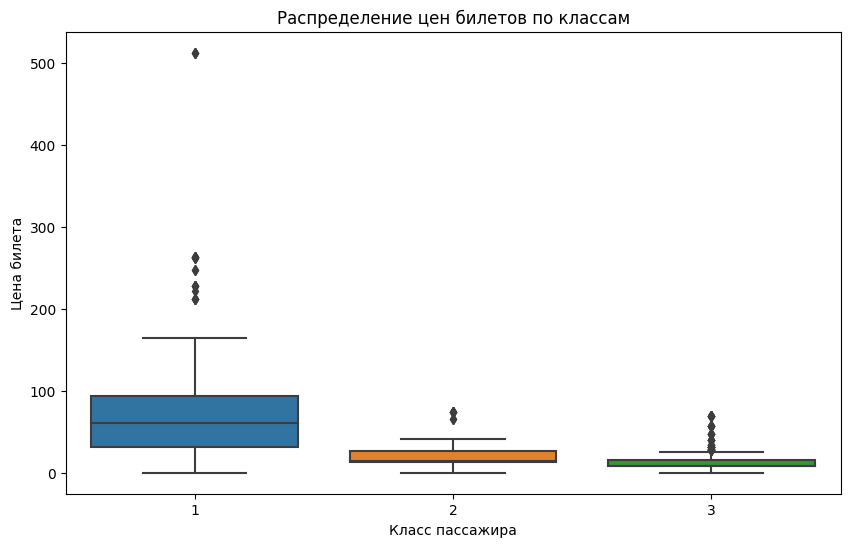

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка датасета (если он уже не был загружен)
dataset = sns.load_dataset('titanic')

# Вычисление корреляции между 'pclass' и 'fare'
correlation = dataset['pclass'].corr(dataset['fare'])
print(f"Корреляция между pclass и fare: {correlation:.2f}")

# Расчет средней цены билета для каждого класса
mean_fares = dataset.groupby('pclass')['fare'].mean()
print(mean_fares)

# Визуализация распределения цен билетов для каждого класса
plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='fare', data=dataset)
plt.title('Распределение цен билетов по классам')
plt.ylabel('Цена билета')
plt.xlabel('Класс пассажира')
plt.show()
#Есть отрицательная корреляция между классом пассажира и ценой билета, что логично, так как первый класс обычно дороже третьего.
#График подтверждает эту зависимость: медиана цены билета наибольшая для первого класса и наименьшая для третьего.
#В первом классе также присутствует большой разброс цен, что может свидетельствовать о различных категориях кают или дополнительных услугах в первом классе.

**Task 5** (0.5 points) <br/>
The same question as in task 4 about correlation between *embarked* and *ticket priсe*.

embarked
C    59.954144
Q    13.276030
S    27.079812
Name: fare, dtype: float64


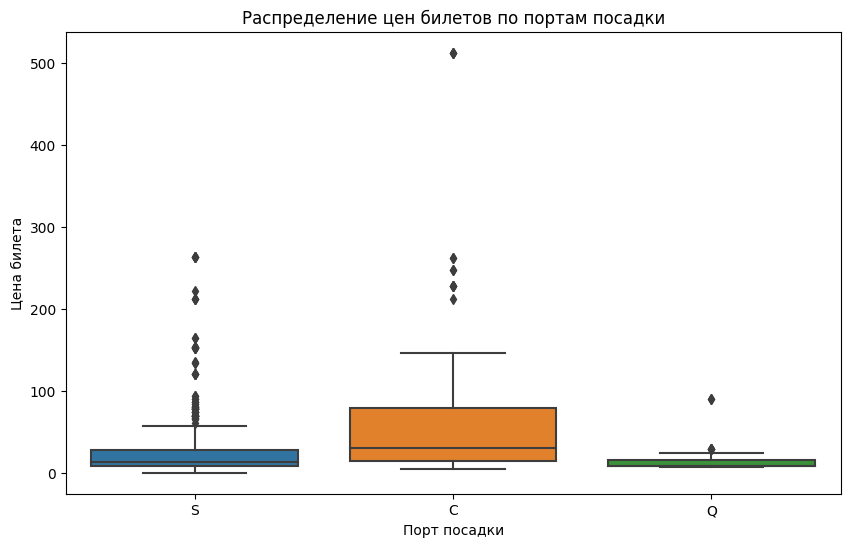

In [18]:
# Расчет средней цены билета для каждого порта
mean_fares_by_port = dataset.groupby('embarked')['fare'].mean()
print(mean_fares_by_port)

# Визуализация распределения цен билетов в зависимости от порта посадки
plt.figure(figsize=(10, 6))
sns.boxplot(x='embarked', y='fare', data=dataset)
plt.title('Распределение цен билетов по портам посадки')
plt.ylabel('Цена билета')
plt.xlabel('Порт посадки')
plt.show()


**Task 6** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Provide the same visualization for males and females separately. Make conclusions about what you see on the plots

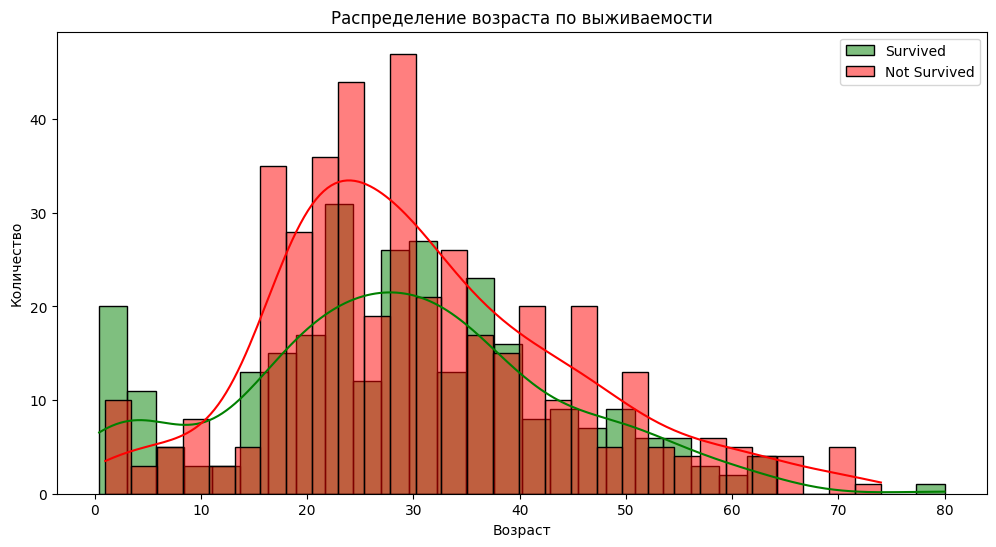

Средний возраст выживших: 28.34
Средний возраст погибших: 30.63


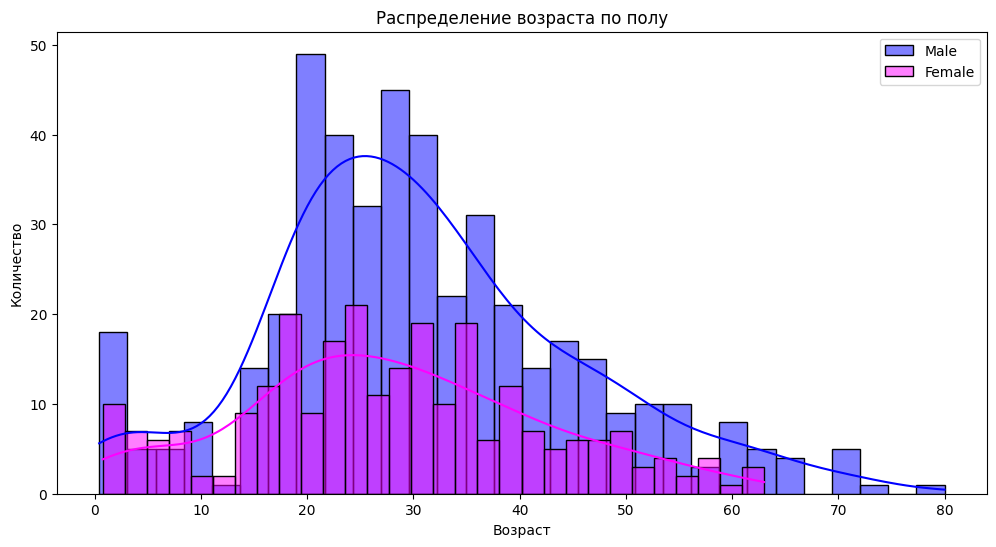

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Визуализация распределения возраста для выживших и не выживших пассажиров
plt.figure(figsize=(12, 6))
sns.histplot(dataset[dataset['survived'] == 1]['age'].dropna(), color='green', label='Survived', kde=True, bins=30)
sns.histplot(dataset[dataset['survived'] == 0]['age'].dropna(), color='red', label='Not Survived', kde=True, bins=30)
plt.title('Распределение возраста по выживаемости')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.legend()
plt.show()

# Расчет среднего возраста для каждой группы
mean_age_survived = dataset[dataset['survived'] == 1]['age'].mean()
mean_age_not_survived = dataset[dataset['survived'] == 0]['age'].mean()
print(f"Средний возраст выживших: {mean_age_survived:.2f}")
print(f"Средний возраст погибших: {mean_age_not_survived:.2f}")

# Визуализация распределения возраста для мужчин и женщин
plt.figure(figsize=(12, 6))
sns.histplot(dataset[dataset['sex'] == 'male']['age'].dropna(), color='blue', label='Male', kde=True, bins=30)
sns.histplot(dataset[dataset['sex'] == 'female']['age'].dropna(), color='magenta', label='Female', kde=True, bins=30)
plt.title('Распределение возраста по полу')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.legend()
plt.show()
